# Introduction 

In [24]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("factbook.db")
q = "select * from sqlite_master where type='table' limit 5;"

pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [25]:
q1 = "select * from facts limit 5;"
pd.read_sql_query(q1,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Data summary

In [41]:
q2 = "select min(population) min_pop, max(population) max_pop, min(population_growth) min_pop_growth, max(population_growth) max_pop_growth from facts"
pd.read_sql_query(q2,conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


# Data outliers

In [42]:
q3 = "SELECT * from facts where population==(SELECT min(population) from facts)"
pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [43]:
q4 = "SELECT * from facts where population==(SELECT max(population) from facts)"
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


There is no population in Antarctica. The place with the most population is not a country, it is the total population of the world.

# Histogram of statistics without outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cdf288898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9cdf11af60>]], dtype=object)

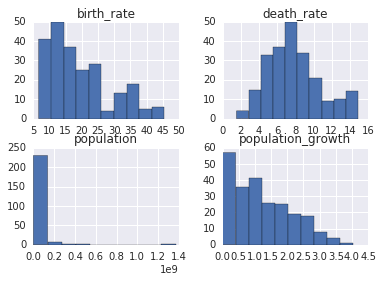

In [44]:
q5 = '''
SELECT population, population_growth, birth_rate, death_rate from facts
WHERE population !=(SELECT max(population) from facts)
and population !=(SELECT min(population) from facts)
'''
pd.read_sql_query(q5,conn)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
results = pd.read_sql_query(q5,conn)
fig,ax = plt.subplots()
results.hist(ax=ax)


# Which countries have the highest population density?

In [62]:
q6 = '''
SELECT name,cast(population as float)/cast(area as float) density
FROM facts ORDER BY density DESC LIMIT 10
'''
pd.read_sql_query(q6,conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


AttributeError: 'AxesSubplot' object has no attribute 'xticks'

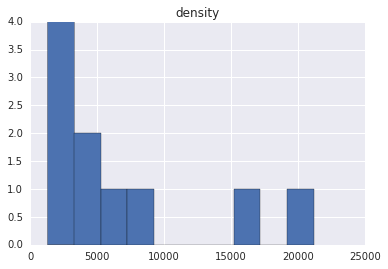

In [63]:
fig, ax = plt.subplots()
pd.read_sql_query(q6,conn).hist(ax=ax)
ax.xticks(name)